In [ ]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
import praw

In [ ]:
client_id = 'mS4MsYL8A8HG-bYeVhHmyA'
client_secret = '3lu5_pfUwTLkSAt_ie19feArCbC2UA'
username = 'Enter your username'
password = 'Enter your password'
user_agent = 'RedditDataAnalysis/1.0 (Google Colab - Contact: dhruvgoyal7056@gmail.com)'

reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     username=username,
                     password=password,
                     user_agent=user_agent)

In [ ]:
subreddit = reddit.subreddit('python')
top_posts = subreddit.top(limit=10)
for post in top_posts:
    print(post.title)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Lad wrote a Python script to download Alexa voice recordings, he didn't expect this email.
This post has:
I redesign the Python logo to make it more modern
Automate the boring stuff with python - tinder
Just finished programming and building my own smart mirror in python, wrote all of the code myself and implemented my own voice control and facial recognition features
I'm excited to share my first published book, Introduction to Python Programming for Business and Social Science Applications -- specifically geared towards students not specifically in computer science
Drawing Mona Lisa with 256 circles using evolution [Github repo in comments]
I made a simulation using Python in which a neural network learns to race
Thanks to everyone’s advice, my mouse drawing algorithm has gotten much better and faster!
Debugging Cheat Sheet


TextBlob

In [ ]:
import nltk
from nltk.corpus import stopwords #A corpus (plural: corpora) refers to a large collection of text documents Stopwords can be a, an, the
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob  # Import TextBlob for sentiment analysis

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])

    # Tokenization
    tokens = word_tokenize(text)
    #print(tokens)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Example usage
post_titles = [
    "Lad wrote a Python script to download Alexa voice recordings, he didn't expect this email.",
    "I redesign the Python logo to make it more modern",
    "Automate the boring stuff with python - tinder",
    "Just finished programming and building my own smart mirror in python, wrote all of the code myself and implemented my own voice control and facial recognition features",
    "I'm excited to share my first published book, Introduction to Python Programming for Business and Social Science Applications -- specifically geared towards students not specifically in computer science",
    "Drawing Mona Lisa with 256 circles using evolution [Github repo in comments]",
    "I made a simulation using Python in which a neural network learns to race",
    "Thanks to everyone’s advice, my mouse drawing is an danger algorithm has gotten much better and faster!",
    "Debugging Cheat Sheet",
    "The team's morale plummeted after the project's failure, resulting in increased stress and frustration among team members."
]

cleaned_titles = []  # Create an empty list to store cleaned titles

for title in post_titles:
    cleaned_title = preprocess_text(title)
    cleaned_titles.append(cleaned_title)  # Append cleaned title to the list

# Sentiment analysis using TextBlob
sentiments = []
for cleaned_title in cleaned_titles:
    blob = TextBlob(cleaned_title)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        sentiment = 'positive'
    elif sentiment_score < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    sentiments.append(sentiment)
    print(f"Cleaned Title: {cleaned_title}\nSentiment: {sentiment}\n")

Cleaned Title: lad wrote python script download alexa voic record didnt expect email
Sentiment: neutral

Cleaned Title: redesign python logo make modern
Sentiment: positive

Cleaned Title: autom bore stuff python tinder
Sentiment: neutral

Cleaned Title: finish program build smart mirror python wrote code implement voic control facial recognit featur
Sentiment: positive

Cleaned Title: im excit share first publish book introduct python program busi social scienc applic specif gear toward student specif comput scienc
Sentiment: positive

Cleaned Title: draw mona lisa 256 circl use evolut github repo comment
Sentiment: neutral

Cleaned Title: made simul use python neural network learn race
Sentiment: neutral

Cleaned Title: thank everyon advic mous draw danger algorithm gotten much better faster
Sentiment: positive

Cleaned Title: debug cheat sheet
Sentiment: neutral

Cleaned Title: team moral plummet project failur result increas stress frustrat among team member
Sentiment: neutral



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


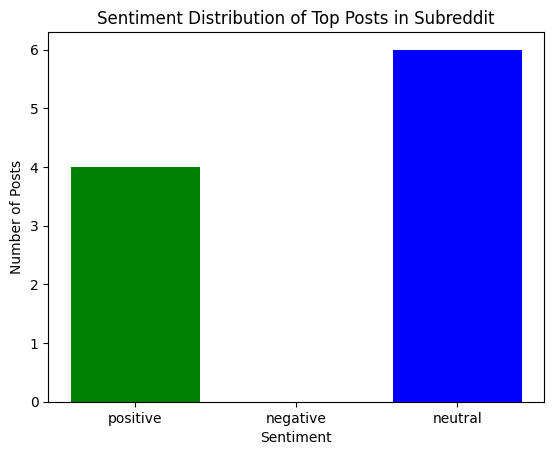

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Count the occurrences of each sentiment
sentiment_counts = {
    'positive': sentiments.count('positive'),
    'negative': sentiments.count('negative'),
    'neutral': sentiments.count('neutral')
}

# Data for plotting
labels = sentiment_counts.keys()
values = sentiment_counts.values()

# Create a bar chart
plt.bar(labels, values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.title('Sentiment Distribution of Top Posts in Subreddit')
plt.show()


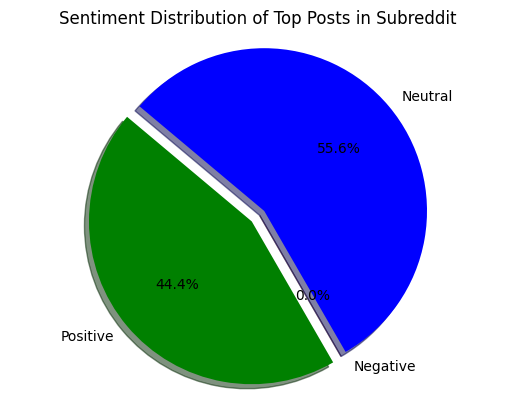

In [ ]:
import matplotlib.pyplot as plt


total_posts = len(sentiments)
positive_percentage = (sentiment_counts['positive'] / total_posts) * 100
negative_percentage = (sentiment_counts['negative'] / total_posts) * 100
neutral_percentage = (sentiment_counts['neutral'] / total_posts) * 100

# Data for pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive) for emphasis

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.title('Sentiment Distribution of Top Posts in Subreddit')

plt.show()


In [ ]:


# Calculate percentages again for clarity
total_posts = len(sentiments)
positive_percentage = (sentiment_counts['positive'] / total_posts) * 100
negative_percentage = (sentiment_counts['negative'] / total_posts) * 100
neutral_percentage = (sentiment_counts['neutral'] / total_posts) * 100

# Print out the percentages for interpretation
print(f"Percentage of Positive Sentiment: {positive_percentage:.2f}%")
print(f"Percentage of Negative Sentiment: {negative_percentage:.2f}%")
print(f"Percentage of Neutral Sentiment: {neutral_percentage:.2f}%")

# Interpretation based on percentages
if positive_percentage > negative_percentage:
    print("There is a predominance of positive sentiment.")
elif positive_percentage < negative_percentage:
    print("There is a predominance of negative sentiment.")
else:
    print("Positive and negative sentiments are balanced.")

# Additional insights based on neutral sentiment
if neutral_percentage > 20:
    print("There is a significant amount of neutral sentiment, indicating mixed opinions.")
else:
    print("Neutral sentiment is relatively low.")


Percentage of Positive Sentiment: 44.44%
Percentage of Negative Sentiment: 0.00%
Percentage of Neutral Sentiment: 55.56%
There is a predominance of positive sentiment.
There is a significant amount of neutral sentiment, indicating mixed opinions.


VADER sentiment analyzer

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Sentiment analysis using VADER
sentiments_vader = []
for cleaned_title in cleaned_titles:
    # Get the sentiment scores using VADER
    scores = sid.polarity_scores(cleaned_title)

    # Classify sentiment based on compound score
    if scores['compound'] > 0.05:
        sentiment = 'positive'
    elif scores['compound'] < -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    sentiments_vader.append(sentiment)
    print(f"Cleaned Title: {cleaned_title}\nSentiment (VADER): {sentiment}\n")

# Visualize sentiment distribution using the updated sentiments_vader list
# Create a bar chart or any other suitable visualization
# ...


Cleaned Title: lad wrote python script download alexa voic record didnt expect email
Sentiment (VADER): neutral

Cleaned Title: redesign python logo make modern
Sentiment (VADER): neutral

Cleaned Title: autom bore stuff python tinder
Sentiment (VADER): negative

Cleaned Title: finish program build smart mirror python wrote code implement voic control facial recognit featur
Sentiment (VADER): positive

Cleaned Title: im excit share first publish book introduct python program busi social scienc applic specif gear toward student specif comput scienc
Sentiment (VADER): positive

Cleaned Title: draw mona lisa 256 circl use evolut github repo comment
Sentiment (VADER): neutral

Cleaned Title: made simul use python neural network learn race
Sentiment (VADER): neutral

Cleaned Title: thank everyon advic mous draw danger algorithm gotten much better faster
Sentiment (VADER): positive

Cleaned Title: debug cheat sheet
Sentiment (VADER): negative

Cleaned Title: team moral plummet project failur

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


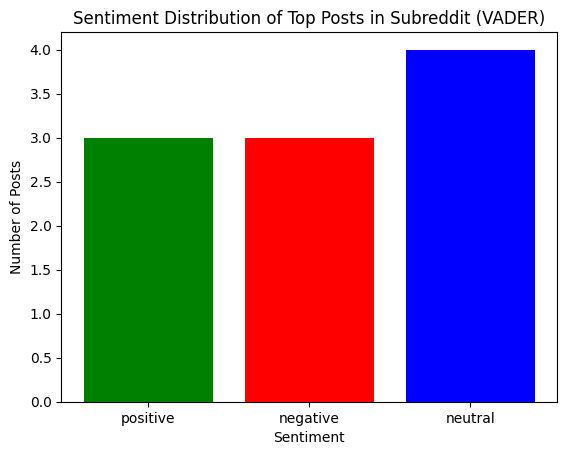

In [ ]:
import matplotlib.pyplot as plt



# Count the occurrences of each sentiment
sentiment_counts_vader = {
    'positive': sentiments_vader.count('positive'),
    'negative': sentiments_vader.count('negative'),
    'neutral': sentiments_vader.count('neutral')
}

# Data for plotting
labels_vader = sentiment_counts_vader.keys()
values_vader = sentiment_counts_vader.values()

# Create a bar chart for VADER sentiments
plt.bar(labels_vader, values_vader, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.title('Sentiment Distribution of Top Posts in Subreddit (VADER)')
plt.show()


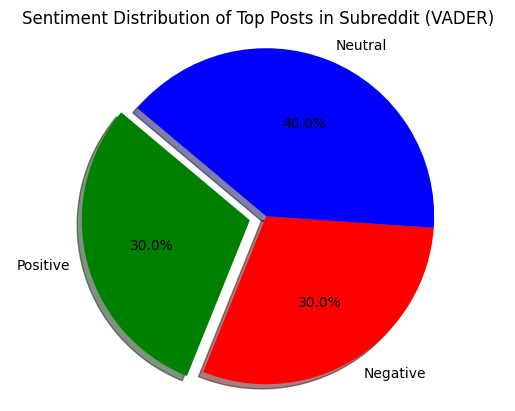

In [ ]:
import matplotlib.pyplot as plt


total_posts_vader = sum(sentiment_counts_vader.values())
positive_percentage_vader = (sentiment_counts_vader['positive'] / total_posts_vader) * 100
negative_percentage_vader = (sentiment_counts_vader['negative'] / total_posts_vader) * 100
neutral_percentage_vader = (sentiment_counts_vader['neutral'] / total_posts_vader) * 100

# Data for pie chart
labels_vader = ['Positive', 'Negative', 'Neutral']
sizes_vader = [positive_percentage_vader, negative_percentage_vader, neutral_percentage_vader]
colors_vader = ['green', 'red', 'blue']
explode_vader = (0.1, 0, 0)  # Explode the 1st slice (Positive) for emphasis

# Create a pie chart for VADER sentiments
plt.pie(sizes_vader, explode=explode_vader, labels=labels_vader, colors=colors_vader,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.title('Sentiment Distribution of Top Posts in Subreddit (VADER)')

plt.show()


In [ ]:


# Calculate percentages again for clarity
total_posts_vader = sum(sentiment_counts_vader.values())
positive_percentage_vader = (sentiment_counts_vader['positive'] / total_posts_vader) * 100
negative_percentage_vader = (sentiment_counts_vader['negative'] / total_posts_vader) * 100
neutral_percentage_vader = (sentiment_counts_vader['neutral'] / total_posts_vader) * 100

# Print out the percentages for interpretation
print(f"Percentage of Positive Sentiment: {positive_percentage_vader:.2f}%")
print(f"Percentage of Negative Sentiment: {negative_percentage_vader:.2f}%")
print(f"Percentage of Neutral Sentiment: {neutral_percentage_vader:.2f}%")

# Interpretation based on percentages
if positive_percentage_vader > negative_percentage_vader:
    print("There is a predominance of positive sentiment.")
elif positive_percentage_vader < negative_percentage_vader:
    print("There is a predominance of negative sentiment.")
else:
    print("Positive and negative sentiments are balanced.")

# Additional insights based on neutral sentiment
if neutral_percentage_vader > 20:
    print("There is a significant amount of neutral sentiment, indicating mixed opinions.")
else:
    print("Neutral sentiment is relatively low.")


Percentage of Positive Sentiment: 30.00%
Percentage of Negative Sentiment: 30.00%
Percentage of Neutral Sentiment: 40.00%
Positive and negative sentiments are balanced.
There is a significant amount of neutral sentiment, indicating mixed opinions.


In [ ]:
pip install wordcloud


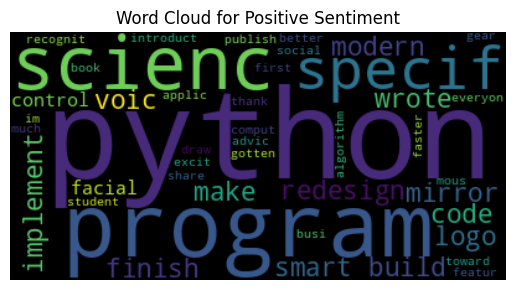

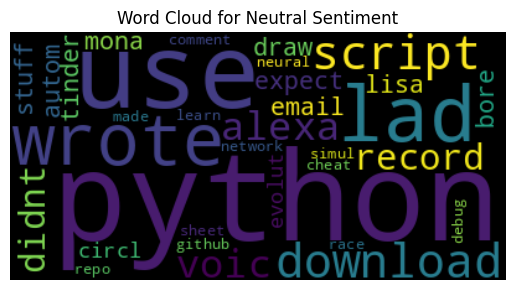

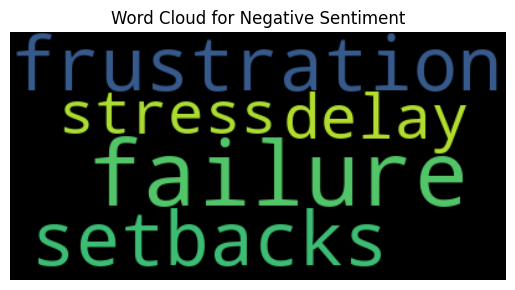

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = [
    ("lad wrote python script download alexa voic record didnt expect email", "neutral"),
    ("redesign python logo make modern", "positive"),
    ("autom bore stuff python tinder", "neutral"),
    ("finish program build smart mirror python wrote code implement voic control facial recognit featur", "positive"),
    ("im excit share first publish book introduct python program busi social scienc applic specif gear toward student specif comput scienc", "positive"),
    ("draw mona lisa 256 circl use evolut github repo comment", "neutral"),
    ("made simul use python neural network learn race", "neutral"),
    ("thank everyon advic mous draw algorithm gotten much better faster", "positive"),
    ("debug cheat sheet", "neutral")
]

# Separate data by sentiment
positive_texts = [title for title, sentiment in data if sentiment == "positive"]
neutral_texts = [title for title, sentiment in data if sentiment == "neutral"]
negative_texts = ["failure frustration setbacks delay stress" for _ in range(5)]  # Hypothetical negative data

# Generate word clouds for positive sentiment
wordcloud_positive = WordCloud().generate(' '.join(positive_texts))

# Generate word clouds for neutral sentiment
wordcloud_neutral = WordCloud().generate(' '.join(neutral_texts))

# Generate word clouds for negative sentiment
wordcloud_negative = WordCloud().generate(' '.join(negative_texts))

# Convert word clouds to images
image_positive = wordcloud_positive.to_image()
image_neutral = wordcloud_neutral.to_image()
image_negative = wordcloud_negative.to_image()

# Display the word cloud images using matplotlib
plt.imshow(image_positive, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Sentiment')
plt.show()

plt.imshow(image_neutral, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Neutral Sentiment')
plt.show()

plt.imshow(image_negative, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Negative Sentiment')
plt.show()
